# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [3]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

Solutions are hidden in the Student Version.


# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10); pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
print("Shape:", tips.shape)
print("\nInfo:"); print(tips.info())
print("\nDescribe:"); display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.


In [21]:
# YOUR WORK: Exercise 0

print(tips['day'].unique())

print(tips['time'].unique())

print(tips.duplicated().sum())

print(f"\naverage total bill: {tips['total_bill'].mean()}")

print(f"average tip: {tips['tip'].mean()}\n")


print("\n", tips['day'].value_counts())
print(tips['time'].value_counts(), "\n")

print(tips.shape)

['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']
1

average total bill: 19.78594262295082
average tip: 2.99827868852459


 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64 

(244, 7)


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
    - Here, for different columns we observe 3 dtypes, float64, int64, object. Object is being used for non numeric dtypes, in this case string.

- Is the dataset balanced across `day` and `time`? Cite one count.
    - No, day and time are not balanced. As we can see above, Dinner time is way higher than Lunch time. similarly day is also not balance, with Friday having way fewer count than the other days.

- One risk if you skip an initial audit here.
    - It could create bias or imbalance in your data. If the data is skewed too much it creates a biased model.

### 🔎 Quick checks
- Report the shape (rows, cols).
    - (244, 7)
- Name 1 non-numeric dtype and why it matters.
    - time. as we can determine at what time there are more people comming in and also at what time people are giving more tips

### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 1) Import & Core Manipulation (20m)

In [22]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [23]:
tips.iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [25]:
tips.query("time=='Lunch' and smoker=='Yes'").head()

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [26]:
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [35]:
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902


### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.


In [50]:
# YOUR WORK: Exercise 1
# p = tips.query("day == 'Sat' and size >= 3")
p = tips.assign(bill_per_person = p['total_bill']/p['size'])
p = p.sort_values('bill_per_person', ascending=True)


# p = tips.query("day == 'Sat' and size >= 3")

mask = (tips['day'] == 'Sat') & (tips['size'] >= 3)
p = tips[mask]

p.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
19,20.65,3.35,Male,No,Sat,Dinner,3,0.162,1.117
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192,1.895
25,17.81,2.34,Male,No,Sat,Dinner,4,0.131,0.585
31,18.35,2.50,Male,No,Sat,Dinner,4,0.136,0.625
33,20.69,2.45,Female,No,Sat,Dinner,4,0.118,0.613


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
    - total_bill and size. When total_bill is higher, the tip is also higher. and larger number of people seem to give more tip and all top tips have 3 or more people
- Explain one filter you wrote in plain English.
    - "day == 'Sat' and size >= 3" this filter means that when the day is Satuarday and size of people is greater thean 3. so we will get all the enties where the party size was greater than 3 on a Saturday.
- One thing you might compute next.
    - tip per person

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
    - 170	50.81	10.00	Male	Yes	Sat	Dinner	3	0.197	3.333	16.937
    - 212	48.33	9.00	Male	No	Sat	Dinner	4	0.186	2.250	12.082
    - 23	39.42	7.58	Male	No	Sat	Dinner	4	0.192	1.895	9.855

- Name one new column and its formula.
    - bill_per_person = total_bill / size

### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
    - both give the same result.
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 2) Cleaning & Preprocessing (15m)

In [51]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64
tip_pct,float64
tip_per_person,float64


In [52]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

,server_name
0,Alice
1,Bob
2,Alice
3,Bob
4,Alice


In [53]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

Before: (246, 10) After: (243, 10)


### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.


In [64]:
# YOUR WORK: Exercise 2

print("Before cast:")
print(tips.memory_usage(deep=True).sum(), "bytes")

tips['size'] = tips['size'].astype('int64')

tips_clean = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']].copy()

print()
tips_clean = tips_clean.drop_duplicates()
print(tips_clean.duplicated().sum())


print("\nAfter cast:")
print(tips.memory_usage(deep=True).sum(), "bytes")


Before cast:
26861 bytes

0

After cast:
26861 bytes


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
    - changed size to int as number of people will alway be a -ve number
- Did you handle duplicates? How many?
    - here we got 4 duplicates
- One naming or string normalization you made.
    - Here we are using snake case for all the variable names


### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 3) Handling Missing Data (15m)

In [65]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()

,0
total_bill,0
sex,0
smoker,0
day,0
time,0
size,21
tip,243


In [66]:
dropped = tips_na.dropna(); dropped.shape

(0, 7)

In [67]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()

,0
total_bill,0
sex,0
smoker,0
day,0
time,0
size,0
tip,243


In [68]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

/tmp/ipython-input-1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


,0
total_bill,0
sex,0
smoker,0
day,0
time,0
size,21
tip,243


In [90]:
tips_interp = tips_na.sort_values('total_bill').assign(**tips_na.select_dtypes('number').interpolate()); tips_interp.isna().sum()

,0
total_bill,0
sex,0
smoker,0
day,0
time,0
size,0
tip,243


### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.


In [92]:
# YOUR WORK: Exercise 3

print("NaN counts before:")
print(tips_na.isna().sum())

tips_processed = tips_na.dropna(subset=['tip', 'size'], how='all').copy()

tips_processed['size'] = tips_processed.groupby('day', observed=False)['size'].transform(lambda s: s.fillna(round(s.mean())))

print(tips_processed)


print("\nNaN counts after:")
print(tips_processed.isna().sum())

NaN counts before:
total_bill      0
sex             0
smoker          0
day             0
time            0
size           21
tip           243
dtype: int64
     total_bill     sex smoker   day    time  size  tip
0         16.99  Female     No   Sun  Dinner   2.0  NaN
1         10.34    Male     No   Sun  Dinner   3.0  NaN
2         21.01    Male     No   Sun  Dinner   3.0  NaN
3         23.68    Male     No   Sun  Dinner   2.0  NaN
5         25.29    Male     No   Sun  Dinner   4.0  NaN
..          ...     ...    ...   ...     ...   ...  ...
238       35.83  Female     No   Sat  Dinner   3.0  NaN
240       27.18  Female    Yes   Sat  Dinner   2.0  NaN
241       22.67    Male    Yes   Sat  Dinner   2.0  NaN
242       17.82    Male     No   Sat  Dinner   2.0  NaN
243       18.78  Female     No  Thur  Dinner   2.0  NaN

[222 rows x 7 columns]

NaN counts after:
total_bill      0
sex             0
smoker          0
day             0
time            0
size            0
tip           222
d

### ✍️ Analysis (Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
    - dropna removes the whole row, and removes datapoints, while groupwise brings datapoints to singular positions. dropna reduces the quantity of points while groupwise reduces how spread out they are.
- What assumption does your fill strategy make?
    - That the missing values can be approximated by the average party size for that day.”
- When would interpolation be inappropriate here?
    - nterpolation is inappropriate here for categorical columns and for discrete counts like size, or when rows don’t have a natural sequential order (like time).

### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.

### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 4) Analysis & Visualization (20m)

In [93]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

Overall tip %: 0.152


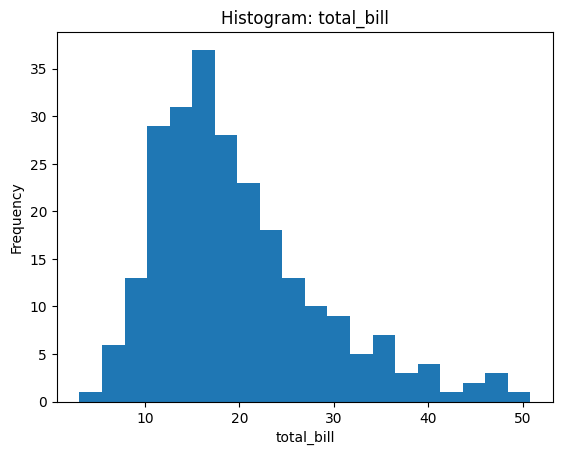

In [94]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

/tmp/ipython-input-2922675328.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


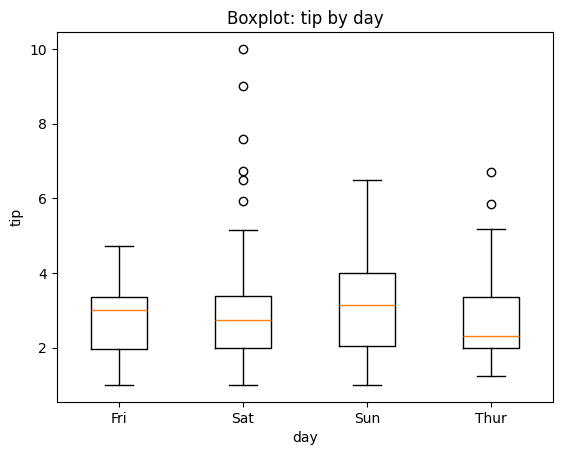

In [95]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

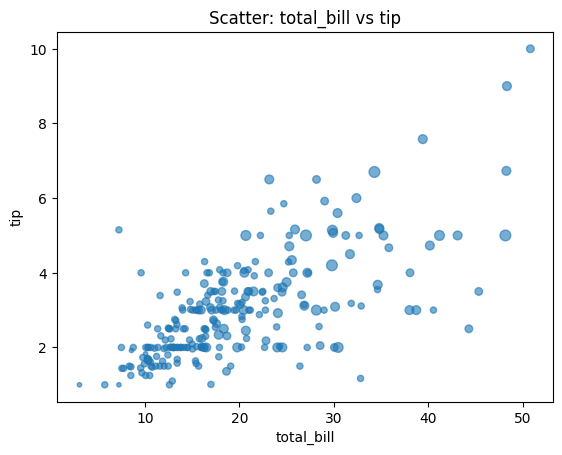

In [96]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

/tmp/ipython-input-3890832865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('day')['tip_pct'].mean()


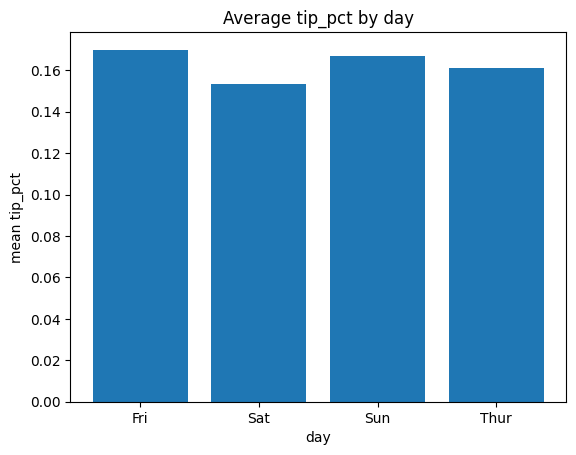

In [97]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.


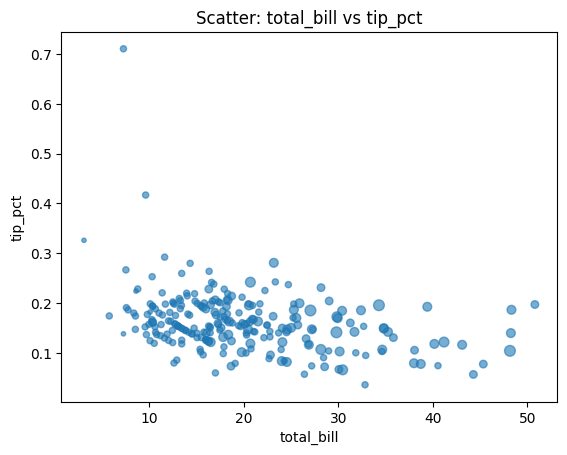

/tmp/ipython-input-1271971613.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('time')['total_bill'].mean()


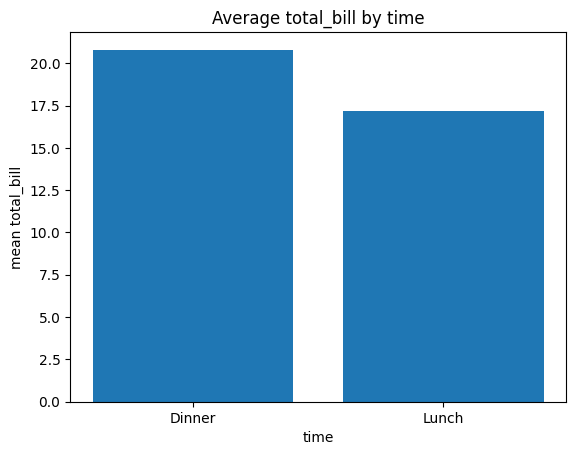

/tmp/ipython-input-1271971613.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("time")["tip"].describe()


Text(0.5, 1.0, 'Average Tip % by Party Size')

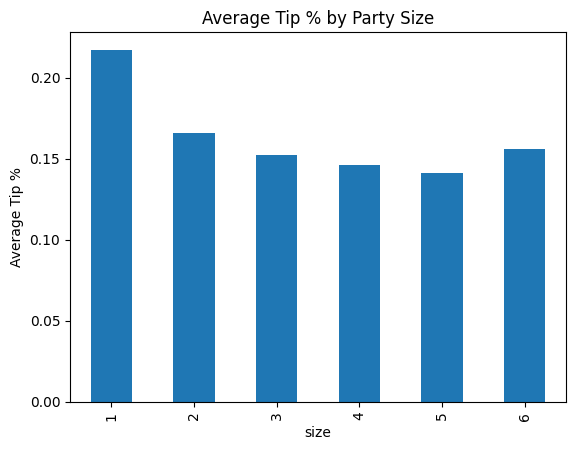

In [104]:
# YOUR WORK: Exercise 4

plt.figure(); plt.scatter(tips['total_bill'], tips['tip_pct'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip_pct'); plt.xlabel('total_bill'); plt.ylabel('tip_pct'); plt.show()



avg_tip_pct = tips.groupby('time')['total_bill'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average total_bill by time'); plt.xlabel('time'); plt.ylabel('mean total_bill'); plt.show()


tips.groupby("time")["tip"].describe()



tips.groupby("size")["tip_pct"].mean().plot(kind="bar")
plt.ylabel("Average Tip %")
plt.title("Average Tip % by Party Size")

### ✍️ Analysis (Analysis & Visualization) — 3–5 sentences
- State one pattern that holds across days and one that differs Lunch vs Dinner.
    - Tip size rises with total bill on all days. and Dinner bills and tips are, on average, higher than Lunch.
- Interpret scatter: linear? heteroscedastic?
    - its hereroscedastic
- What would you plot next?
    - boxplots of tip % by day

### 🔎 Quick checks
- Quote one `.describe()` stat that supports your claim.
- Ensure axes labels/titles are informative.

### ➕ Extension (pick one)
- Add a follow-up chart (e.g., tip% by party size) and describe it.
- Bucket `total_bill` and compare medians.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 5) Grouping & Merging (20m)

In [105]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

/tmp/ipython-input-754671917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (tips.groupby(['day','time'])


count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12    19.663    2.940        0.159
    Lunch       7    12.846    2.383        0.189
Sat Dinner     87    20.441    2.993        0.153
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76    21.410    3.255        0.167

In [107]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

/tmp/ipython-input-4290215540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip_pct'].apply(pct_above_20)


,tip_pct
day,
Fri,0.211
Sat,0.115
Sun,0.197
Thur,0.161


In [108]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

,day,is_weekend
90,Fri,False
19,Sat,True
0,Sun,True
77,Thur,False


### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.


In [135]:
# YOUR WORK: Exercise 5

sums = tips.groupby(['smoker','sex'])[['total_bill','tip']].sum()
sums


tips['time_pair'] = tips['time'].map({'Lunch':'L','Dinner':'D'})
tips[['time','time_pair']].drop_duplicates()


print(sums.index)
print(sums.columns)

tips['avg_tip_pp'] = tips['tip'] / tips['size']
ranked = tips.groupby("day")['avg_tip_pp'].mean().sort_values(ascending=False)
print(ranked)


MultiIndex([( 'No', 'Female'),
            ( 'No',   'Male'),
            ('Yes', 'Female'),
            ('Yes',   'Male')],
           names=['smoker', 'sex'])
Index(['total_bill', 'tip'], dtype='object')
day
Fri     1.329
Sun     1.213
Sat     1.213
Thur    1.177
Name: avg_tip_pp, dtype: float64


/tmp/ipython-input-2096977304.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sums = tips.groupby(['smoker','sex'])[['total_bill','tip']].sum()
/tmp/ipython-input-2096977304.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranked = tips.groupby("day")['avg_tip_pp'].mean().sort_values(ascending=False)


### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
    - Saturday has the highest total tip amount,
- How does `tip_pct` vs `tip` change ranking?
    - Ranking by raw tip favors high-spend days and larger groups while Ranking by tip percentage, however, highlights relative generosity in smaller or lower-bill settings
- What join-key assumptions are you making?

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 6) Reshaping & Pivoting (15m)

In [136]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

/tmp/ipython-input-3973676478.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv


time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [137]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()


,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.


In [148]:
# YOUR WORK: Exercise 6

# piv = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean')
piv = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='median')
piv.head()
print(piv.shape)
print(piv.columns)

long = piv.reset_index().melt(id_vars=['size'], var_name='day', value_name='mean_total_bill')
long.head()
print(long.shape)

(6, 4)
CategoricalIndex(['Fri', 'Sat', 'Sun', 'Thur'], categories=['Fri', 'Sat', 'Sun', 'Thur'], ordered=False, dtype='category', name='day')
(24, 3)


/tmp/ipython-input-315095082.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='median')


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
    - pivot_table dropped combinations of size and day that didn’t exist in the data, while melt kept every combination as an explicit row.
- Explain wide↔long trade-offs here.
    - Wide format (pivot_table) is easier for quick comparisons across days in one row, but long format (melt) is “tidy” and works better with most plotting libraries.
- Which format suits your chosen chart and why?
    - Long format is better for charts like grouped bars or faceted lines, because each observation has its own row, making it straightforward for visualization tools.

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
    - mean vs median
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 7) Mini-Project: When are tips the most generous? (5–10m)

day   time  
Fri   Lunch     0.189
Sun   Dinner    0.167
Thur  Lunch     0.161
      Dinner    0.160
Fri   Dinner    0.159
dtype: float64


/tmp/ipython-input-157246538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


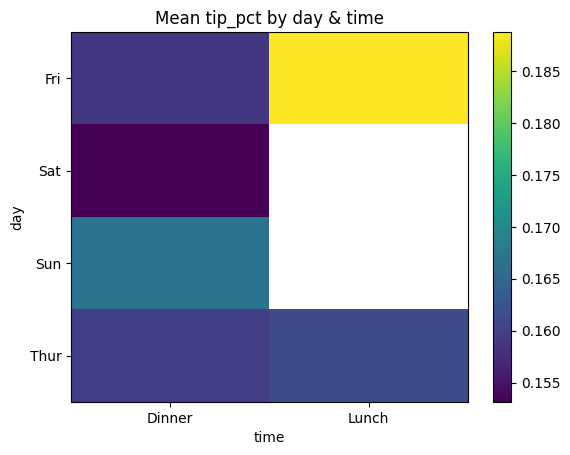

In [149]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

In [151]:
top3 = tips.groupby(['day','time'])['tip_pct'].agg(['mean','count']).sort_values('mean', ascending=False).head(3)
print(top3)


median_rank = tips.groupby(['day','time'])['tip_pct'].median().sort_values(ascending=False)
print("\nRanking by median tip_pct:")
print(median_rank.head(5), "\n")

              mean  count
day  time                
Fri  Lunch   0.189      7
Sun  Dinner  0.167     76
Thur Lunch   0.161     61

Ranking by median tip_pct:
day   time  
Fri   Lunch     0.188
Sun   Dinner    0.161
Thur  Dinner    0.160
      Lunch     0.154
Sat   Dinner    0.152
Name: tip_pct, dtype: float64 



/tmp/ipython-input-368635660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top3 = tips.groupby(['day','time'])['tip_pct'].agg(['mean','count']).sort_values('mean', ascending=False).head(3)
/tmp/ipython-input-368635660.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_rank = tips.groupby(['day','time'])['tip_pct'].median().sort_values(ascending=False)


### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
    - Fri, Lunch
- Is it robust to outliers? How to check?
    - Yes, it is higher than rest of the rest. To check properly, we should use a boxplot.
- One follow-up action for a restaurant.
    - Friday Lunch shows higher tipping, the restaurant could promote lunch specials or encourage group reservations on Fridays.

### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [152]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No     3    0.162           1.117   
    Dinner       17.92  4.08    Male     No     2    0.228           2.040   
    Dinner       20.29  2.75  Female     No     2    0.136           1.375   
    Dinner       15.77  2.23  Female     No     2    0.141           1.115   
    Dinner       39.42  7.58    Male     No     4    0.192           1.895   

           server_name time_pair  avg_tip_pp  
day time                                      
Sat Dinner         Bob         D       1.117  
    Dinner       Alice         D       2.040  
    Dinner         Bob         D       1.375  
    Dinner       Alice         D       1.115  
    Dinner         Bob         D       1.895

In [154]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()

/tmp/ipython-input-1221681098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


,day,time,mean_tip_pct
0,Fri,Dinner,0.159
1,Fri,Lunch,0.189
2,Sat,Dinner,0.153
3,Sat,Lunch,NaN
4,Sun,Dinner,0.167


In [157]:
print("Index names:", ti.index.names)
print("Level dtypes:", [ti.index.get_level_values(i).dtype for i in range(ti.index.nlevels)])


ti.loc[("Sat","Dinner")].head()



reset = ti.reset_index()
print(reset.head())


Index names: ['day', 'time']
Level dtypes: [CategoricalDtype(categories=['Fri', 'Sat', 'Sun', 'Thur'], ordered=False, categories_dtype=object), CategoricalDtype(categories=['Dinner', 'Lunch'], ordered=False, categories_dtype=object)]
   day    time  total_bill   tip     sex smoker  size  tip_pct  \
0  Fri  Dinner       28.97  3.00    Male    Yes     2    0.104   
1  Fri  Dinner       22.49  3.50    Male     No     2    0.156   
2  Fri  Dinner        5.75  1.00  Female    Yes     2    0.174   
3  Fri  Dinner       16.32  4.30  Female    Yes     2    0.263   
4  Fri  Dinner       22.75  3.25  Female     No     2    0.143   

   tip_per_person server_name time_pair  avg_tip_pp  
0           1.500       Alice         D       1.500  
1           1.750         Bob         D       1.750  
2           0.500       Alice         D       0.500  
3           2.150         Bob         D       2.150  
4           1.625       Alice         D       1.625  


### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
    - A MultiIndex allows you to organize the data hierarchically, so you can directly slice by combinations like ('Sat','Dinner') without needing multiple conditions. It also simplifies grouped calculations by letting you target levels instead of separate columns.
- Give one easier slice enabled by the index.
    - For example, ti.loc[("Sat","Dinner")] quickly retrieves only the Saturday Dinner rows, which would otherwise require a boolean filter like (tips['day']=="Sat") & (tips['time']=="Dinner").
- Any pitfalls when saving/loading with MultiIndex?
    - Yes, saving to CSV or Excel often flattens the MultiIndex into multiple header rows or drops index names. When reloading, you usually need to reset/rebuild the index with reset_index() or set_index() to restore the hierarchy

### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 9) Time Series & Resampling (15m)

In [158]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

,total_bill,tip,tip_pct,tip_pct_roll4
date,,,,
2024-01-07,130.67,19.80,0.152,0.152
2024-01-14,136.08,19.59,0.144,0.148
2024-01-21,118.57,23.25,0.196,0.164
2024-01-28,139.17,22.08,0.159,0.163
2024-02-04,122.78,19.97,0.163,0.165


### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
- Interpret divergence between raw and rolling series.
- Why pick `W` vs `MS`?

### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 10) Rolling & Window Ops (10m)

In [ ]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
- What happens at the edges for rolling windows?
- When is `expanding` more suitable than `rolling`?

### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 11) Text Data: vectorized & regex (10m)

In [ ]:
notes = np.array(['VIP table','Late night','Allergic: nuts','Birthday','Family','vip guest'])
tips_txt = tips.copy()
tips_txt['note'] = np.resize(notes, len(tips_txt)).astype('string')
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\s*(\w+)', expand=False)
tips_txt[['note','is_vip','allergy']].head()

### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
- How sensitive are your results to case/spacing?
- One potential false positive in your pattern.

### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 12) Nullable dtypes & Memory (5m)

In [ ]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
- When would you avoid `category`?
- Any effect on joins/groupbys?

### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [ ]:
subset = tips[['total_bill','tip','day','time','size']].head(20)
subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
- Did any dtype change after round-trip?
- When to use line-delimited JSON?

### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 14) Join Patterns (10–15m)

In [ ]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

In [ ]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

In [ ]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
- Where would `merge_asof` fit in a real pipeline?
- Any ordering assumptions for `merge_ordered`?

### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [ ]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))
eval_demo = tips.eval('bill_pp = total_bill / size')
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
- Where would you break the chain for debugging?
- When is `.eval` useful vs risky?

### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [ ]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
- How did `cut` vs `qcut` change bucket sizes?
- When is `where` preferable to boolean indexing?

### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 17) Styling & Export (5m)

In [159]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)
'Wrote tips_report.html'

/tmp/ipython-input-1253526996.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)


'Wrote tips_report.html'

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
- How would a stakeholder use this HTML report?
- One caution about styled HTML vs raw data files.

### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [160]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [161]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [163]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Missing values per column:
deck           688
age            177
embarked      

## A) Data Cleaning & Feature Engineering

In [164]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

/tmp/ipython-input-587888411.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_med = df.groupby(['sex','class'])['age'].transform('median')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_pp,age_group
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,Unknown,Southampton,no,False,2,3.625,YoungAdult
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False,2,35.642,MidAge
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Unknown,Southampton,yes,True,1,7.925,YoungAdult
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False,2,26.550,YoungAdult
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,Unknown,Southampton,no,True,1,8.050,YoungAdult


### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [172]:
# YOUR WORK: Exercise A

df['age'].isna().sum()
df['embark_town'].isna().sum()


df['family_size'].max()
df['family_size'].value_counts().head(3)



pct_high_fare = (df['fare_pp'] > 20).mean() * 100
print(f"{pct_high_fare:.2f}% passengers fare_pp > 20")

25.36% passengers fare_pp > 20


## B) Survival Patterns

In [173]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

Overall survival rate: 0.384


/tmp/ipython-input-3625588530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])


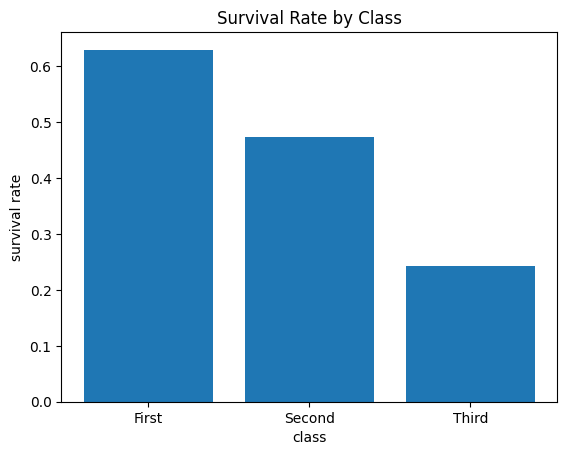

In [174]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

/tmp/ipython-input-271380004.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')


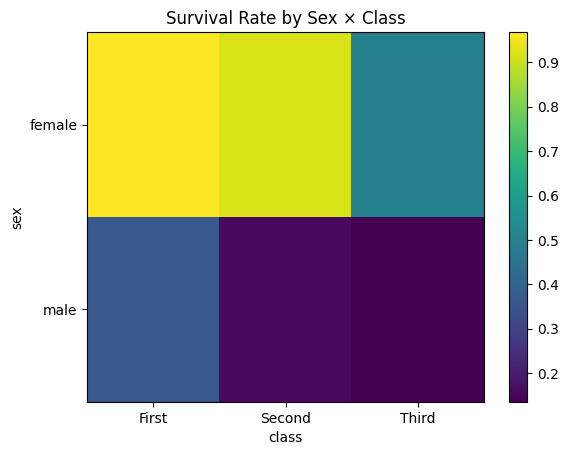

class,First,Second,Third
sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


In [175]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.


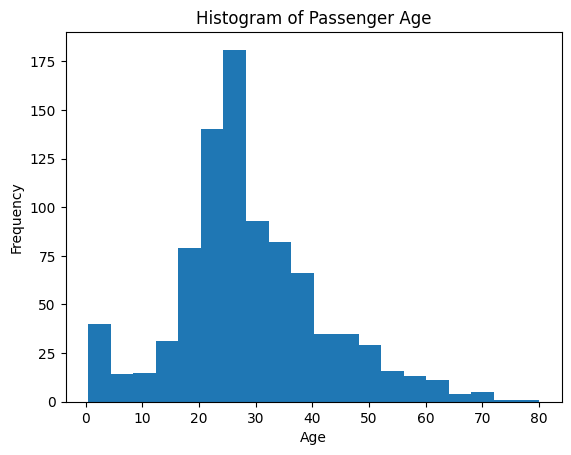

/tmp/ipython-input-3992278827.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(df['class'].cat.categories))


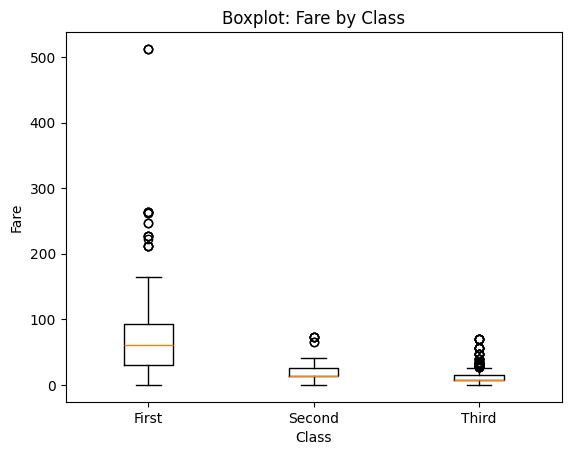

/tmp/ipython-input-3992278827.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('age_group')['survived'].mean()


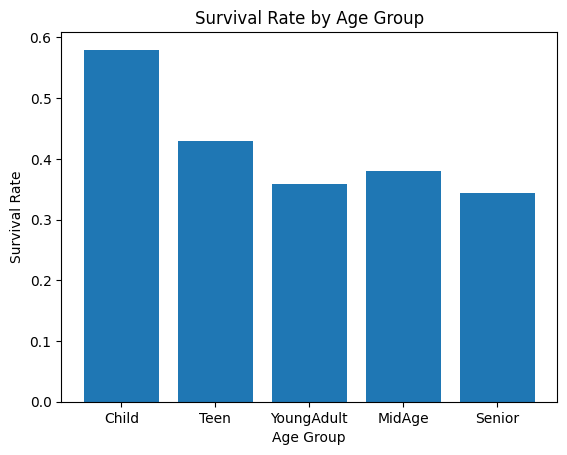

In [178]:
# YOUR WORK: Exercise B



plt.figure()
plt.hist(df['age'].dropna(), bins=20)
plt.title('Histogram of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure()
data = [df.loc[df['class'] == c, 'fare'].dropna() for c in df['class'].cat.categories]
plt.boxplot(data, labels=list(df['class'].cat.categories))
plt.title('Boxplot: Fare by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()


survival_by_age = df.groupby('age_group')['survived'].mean()
plt.figure()
plt.bar(survival_by_age.index.astype(str), survival_by_age.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

## C) Subgroup Discovery

In [185]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

/tmp/ipython-input-1601229680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = (df.groupby(['sex','class','embark_town'])


n  surv_rate
sex    class  embark_town                
female First  Cherbourg     43      0.977
              Southampton   50      0.960
       Second Southampton   67      0.910
       Third  Queenstown    33      0.727
male   First  Cherbourg     42      0.405
female Third  Southampton   88      0.375
male   First  Southampton   79      0.354
       Third  Cherbourg     43      0.233
       Second Southampton   97      0.155
       Third  Southampton  265      0.128

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [184]:
# YOUR WORK: Exercise C


large_family = df[df['family_size'] >= 4]
family_survival = (
    large_family.groupby(['sex', 'class'])
    .agg(n=('survived', 'size'), surv_rate=('survived', 'mean'))
    .sort_values('surv_rate', ascending=False)
)
family_survival.head()


fare_bins = [0, 5, 10, 20, 50, df['fare_pp'].max()]
fare_labels = ['0-5', '5-10', '10-20', '20-50', '50+']
df['fare_pp_bucket'] = pd.cut(df['fare_pp'], bins=fare_bins, labels=fare_labels, include_lowest=True)
bucket_survival = df.groupby('fare_pp_bucket')['survived'].mean()
bucket_survival

/tmp/ipython-input-1537720467.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  large_family.groupby(['sex', 'class'])
/tmp/ipython-input-1537720467.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_survival = df.groupby('fare_pp_bucket')['survived'].mean()


,survived
fare_pp_bucket,
0-5,0.264
5-10,0.273
10-20,0.431
20-50,0.556
50+,0.727


## D) Deliverables

In [186]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.

### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1